<a href="https://colab.research.google.com/github/vishalbalaji-v/AI---1/blob/main/HW-1/AI_1%3B_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 1: kNN and Linear Regression

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 55

<hr style="height:2.4pt">

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [109]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

### Names of the people who worked on this homework together
#### /names here/

In [110]:
# !pip install seaborn

In [111]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [112]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part A: k-NN and Linear Regression [30 points total] </h2>    <br />


### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.




<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 1:   Exploratory Data Analysis (EDA) [10 points total]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** [2pts] Which variables are quantitative, and which are categorical? 

**1.2** [2pts] What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** [2pts] What is the range of Kilometers that the cars have?

**1.4** [4pts] The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
**Note**: Label your axes.
</div>

## Solutions 

In [113]:
cars = pd.read_csv('/content/drive/MyDrive/Colab files/AI - 1/HW - 1/car_dekho_full.csv')
print(cars.shape)
cars.head()

(601, 4)


,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


### 1.1

**Which variables are quantitative, and which are categorical?**

In [114]:
for i in cars.columns:
  print(f'Number of unique values in {i} column is {cars[i].nunique()}')

Number of unique values in Year column is 15
Number of unique values in Current_Selling_Price column is 139
Number of unique values in MRP column is 134
Number of unique values in Kms_Driven column is 176


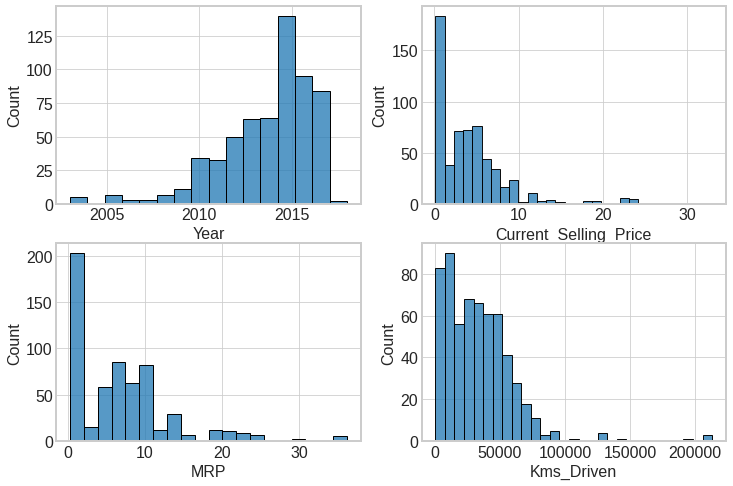

In [115]:
fig, axen = plt.subplots(2, 2, figsize = (12, 8))
for v, ax in zip(cars.columns, axen.ravel()):
    sns.histplot(cars[v], ax=ax) 

From the number of unique values and the histogram plots of the variables, it is clear that only the "Year" variable is categorical, and all the others are continuous. Both Current_Selling_Price and MRP have decimal values, and Kms_Driven spans a huge range, and can be considered continuous variables.

### 1.2

**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [116]:
# Name your variables as mean_csp, mean_mrp, std_csp, std_mrp

# your code here
mean_csp, mean_mrp = np.mean(cars['Current_Selling_Price']), np.mean(cars['MRP'])
std_csp, std_mrp = np.std(cars['Current_Selling_Price']), np.std(cars['MRP'])
# end your code here 


print ("The mean Current Selling Price is", mean_csp,"lakhs")
print ("The mean MRP is", mean_mrp,'lakhs')
print ("The Standard Deviation of Current Selling Price is", std_csp)
print ("The Standard Deviation of MRP is", std_mrp)

The mean Current Selling Price is 4.393078202995008 lakhs
The mean MRP is 6.911552412645585 lakhs
The Standard Deviation of Current Selling Price is 4.514554426823631
The Standard Deviation of MRP is 6.47472759622026


### 1.3

**What is the range of Kilometers that the cars have?**

In [117]:
# your code here
range_kms = max(cars['Kms_Driven']) - min(cars['Kms_Driven'])
print(f'The range of Kilometers driven is {range_kms}')

The range of Kilometers driven is 212500


### 1.4

**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

In [118]:
predictor_cols = list(cars.columns)
predictor_cols.remove('Current_Selling_Price')
print(predictor_cols)

['Year', 'MRP', 'Kms_Driven']


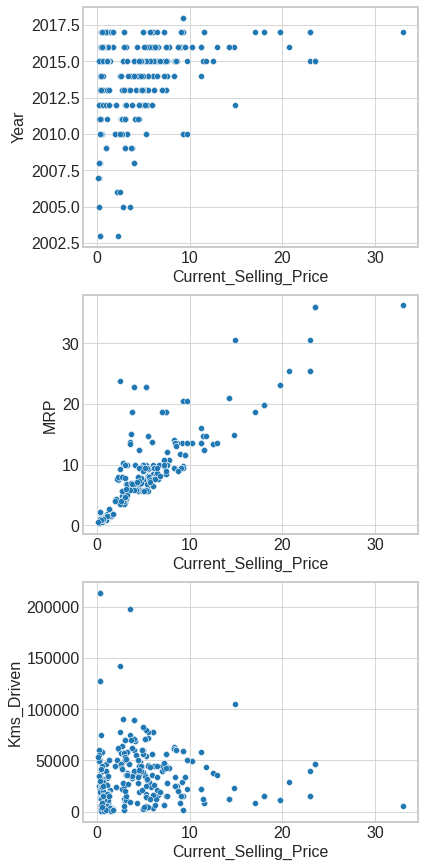

In [119]:
fig, axen = plt.subplots(3, 1, figsize = (6,15))
for i in range(3):
  sns.scatterplot(data=cars, x="Current_Selling_Price", y=predictor_cols[i], ax = axen[i])

**Your answer here**
From the scatter plots, it is clear that MRP might be the best predictor for our response variable

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 2:   k-Nearest Neighbors  [10 points total]</b>
<br /><br />
We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.
<br /><br />

**2.1** [6pts] In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
<br /><br />
    
INSTRUCTIONS:
<br />
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
<br />
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
<br />
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
<br />
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
<br />
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
<br />
- Find the best model based on the test $MSE$ values.
<br />
- Evaluate and report the $R^2$ of the best model.

<br /><br />
**2.2** [4pts] Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
<br /><br />
- How does the value of $k$ affect the fitted model?
<br />
- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
<br />
- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
<br />
    
    </div>

### Solutions

### 2.1
In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

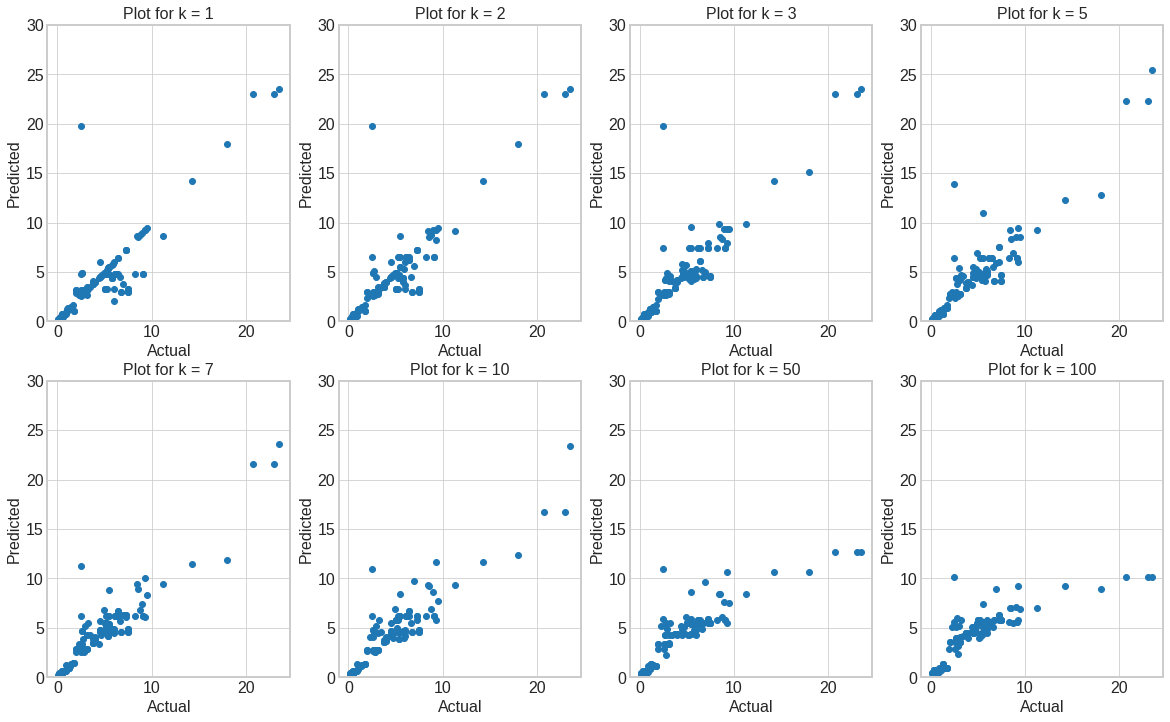

In [120]:
#Choosing your predictor and response variable

# your code here
x = cars[['MRP']]
y = cars['Current_Selling_Price']
# end of your code here 


##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 109)
# end of your code here  


## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend 
# your code here
k_values = [1,2,3,5,7,10,50,100]
train_mse, test_mse, test_r2 = {},{},{}

fig, axen = plt.subplots(2, 4, figsize = (20, 12))
ax = axen.ravel()
for k in range(len(k_values)):
  KNN_model = KNeighborsRegressor(n_neighbors=int(k_values[k]))
  KNN_model.fit(x_train,y_train)
  y_pred = KNN_model.predict(x_test)
  train_mse[k_values[k]] = mean_squared_error(y_train,KNN_model.predict(x_train))
  test_mse[k_values[k]] = mean_squared_error(y_test,y_pred)
  test_r2[k_values[k]] = r2_score(y_test,y_pred)
  ax[k].scatter(y_test,y_pred)
  ax[k].set_title(f'Plot for k = {k_values[k]}')
  ax[k].set(xlabel='Actual', ylabel='Predicted')
  ax[k].set_ylim([0,30])

# Plotting



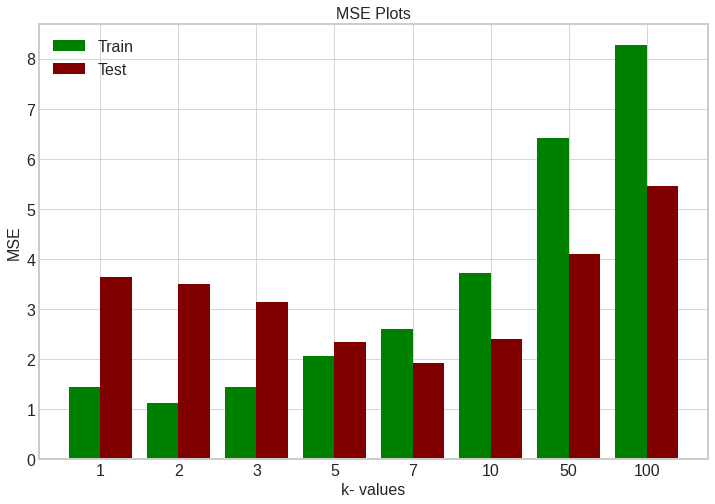

In [121]:
plt.figure(figsize=(12,8))
plt.bar(np.arange(8) - 0.2, train_mse.values(), color = 'green',width = 0.4)
plt.bar(np.arange(8) + 0.2, test_mse.values(), color = 'maroon',width = 0.4)
plt.xticks(np.arange(8), [str(x) for x in k_values])
plt.title('MSE Plots')
plt.xlabel('k- values')
plt.ylabel('MSE')
plt.legend(['Train','Test'])

In [122]:
# Now make the MSE plots
# your code here
# fig, axen = plt.subplots(1, 2, figsize = (16, 8))
# ax = axen.ravel()
# ax[0].bar([str(x) for x in k_values], train_mse.values(), color = 'green')
# ax[0].set_title('Train MSE plot')
# ax[0].set_xlabel('k- values')
# ax[0].set_ylabel('MSE')

# ax[1].bar([str(x) for x in k_values], test_mse.values(), color = 'maroon')
# ax[1].set_title('Test MSE plot')
# ax[1].set_xlabel('k- values')
# ax[1].set_ylabel('MSE')

In [193]:

# Find the best model
# your code here
least_mse = min(test_mse.values())
least_k = list(test_mse.keys())[list(test_mse.values()).index(least_mse)]
print(f'The best k - value based on the test data is {least_k} with MSE of {least_mse:.2f}')

The best k - value based on the test data is 7 with MSE of 1.92


In [194]:
##Compute the R-squared for the best model
# your code here
least_r2 = test_r2[least_k]
print(f'The r2 score for {least_k} is {least_r2:.3f}')

The r2 score for 7 is 0.881


### 2.2

**Your answer here**

**a) How does the value of $k$ affect the fitted model?**
<br />


**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**
<br />

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**



(a) When the k is really low, the model clearly overfits by learning too much from the training set, and as k increases this becomes less of an issue, and at a certain point it starts underfitting by considering too many values to average out. As we clearly see in the barplot above, the Test MSE decreases and then starts rising

(b) If k = n for the model, all predictions will be the average of the response variable. This would be the worst performing model in terms of choice of k.

(c) Both the train and test MSE exhibit similar broad trends such that MSE decreases for a while and then increases, but the inflection point is different in both those cases

(d) The k value changes between different random seeds. But the Test MSE and r2_score of the best predictors are broadly similar for all the test seeds  

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 3:  Simple Linear Regression   [10 points total]</b>
<br /><br />

**3.1** [5pts] We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
<br /><br />
- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
<br />
- Run a Linear Regression model.
<br />
- Report the slope/coefficient and intercept values for the fitted linear model.
<br />
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
<br />
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis. Discuss the shape of the plot and what it shows for the quality of the model.
<br /><br />

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
<br /><br />
**3.2** [5pts] Discuss your results by answering the following questions.  
<br />
- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 
<br />
- What does the sign of the slope of the fitted linear model convey about the data? 
<br />
- Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br /><br />
    </div>


### Solutions

### 3.1
**Predict the selling price**

In [171]:
# your code here
x = cars[['MRP']]
y = cars['Current_Selling_Price']
# end of your code here 


##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 109)

In [ ]:
x_dummy = x_test['MRP'].values
idx = np.argsort(x_dummy)
x_dummy = x_dummy[idx]

Text(0, 0.5, 'Residuals')

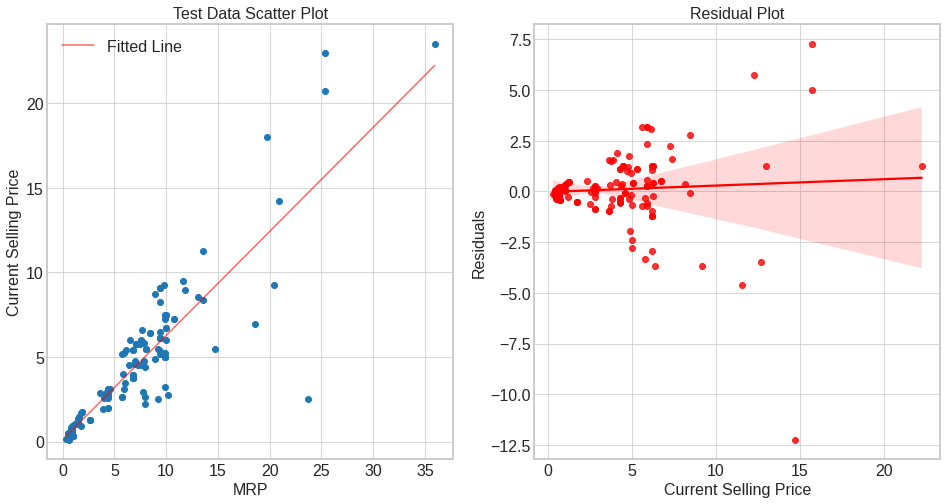

In [189]:
## Fit a linear model to the train data

# your code here
lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

MSE_lreg = mean_squared_error(y_test,y_pred)
r2_lreg = r2_score(y_test,y_pred)
residuals = y_test - y_pred

intercept = lreg.intercept_
slope = lreg.coef_[0]

x_dummy = x_test['MRP'].values
idx = np.argsort(x_dummy)
x_dummy = x_dummy[idx]

y_pred_formula = intercept + x_dummy*slope
# end of your code here 


## Plot the **residuals** 
# your code here 
fig, axen = plt.subplots(1, 2, figsize = (16, 8))
ax = axen.ravel()

ax[0].scatter(x_test,y_test)
ax[0].set_title('Test Data Scatter Plot')
ax[0].set_xlabel('MRP')
ax[0].set_ylabel('Current Selling Price')
ax[0].plot(x_dummy, y_pred_formula, label="Fitted Line", color='red', alpha=0.6)
ax[0].legend()


sns.regplot(x = y_pred, y = residuals, data = None, scatter = True, color = 'red', ax = ax[1])
ax[1].set_title('Residual Plot')
ax[1].set_xlabel('Current Selling Price')
ax[1].set_ylabel('Residuals')

In [192]:
print(f'The MSE of Linear Regression on Test Data is {MSE_lreg:.2f}')
print(f'The R2_score of Linear Regression on Test Data is {r2_lreg:.3f}')

The MSE of Linear Regression on Test Data is 3.14
The R2_score of Linear Regression on Test Data is 0.805


### 3.2

**Your answer here**

**a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?**
<br />


**b) What does the sign of the slope of the fitted linear model convey about the data?**
<br />


**c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />**



(a) The MSE score for Simple Linear Regression (3.14) is higher than MSE for KNN (1.92).

(b) The slope is positive, and indicates that there is a positive relationship between MRP and Current Selling Price. Meaning as MRP increases, Current Selling Price also tends to increase.

(c) The residual plot indicates that residuals are not spread equally around 0 as Current Selling Price increases. This would indicate that the relationship between MRP and Current Selling Price is not linear. The fact that KNN performs better than Linear Regression would also indicate this fact

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2"><b> Question 4:  Linear Regression with Feature engineering  [Optional]</b>
<br /><br />

**4.1** Creating a new variable from existing data: percentage depreciation
<br />
Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 
<br />
Our previous regression model relates the Current selling price to the MRP of the car with the equation:
<br /><br />
$$CSP = \beta_0 + \beta_1*MRP$$
<br />
However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which maybe important factors that affect the overall price of the car. 
<br />
Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
<br />
From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 
<br />
Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  
<br />
Define the percentage depreciation of the Current selling price to the MRP as follows:
<br /><br />
$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
<br /><br />
**4.2** Exploratory Data Analysis
<br /><br />
For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
<br /><br />
Answer the following questions by plotting graphs.
<br /><br />
a) It is seen previously that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?
<br />
b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
<br />
c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 
<br />
d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
<br /><br />
**4.3** Perform additional EDA 
<br /><br />
Feel free to use other plots and statistics to find the best predictor and/or understand the relationship between variables. One example is given below. It is a plot of `Current Selling Price` vs `Year` that is color coded based on the `Kms_Driven`.
<br /><br />
**4.4** Fitting a Linear Regression model
<br /><br />
Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable.
<br /><br />
- Again, split the data into training data of 75% and testing data of 25%.
<br />
- Fit a Linear Regression model for each of the predictors.
<br />
- Predict the model for the train and test data.
<br />
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
<br />
- Report the $MSE$ score from the training and test sets.
<br />
- Find the best model i.e. the best predictor based on the $MSE$ of each model.
<br /><br />

**4.5** Predicting The Current Selling Price using ```perc``` 
<br /><br />
After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score?
    <br /><br />
 </div>

## Solutions

### 4.1

In [ ]:
#Create a new column perc and add to the dataframe
# your code here

#Creating a new column perc


### 4.2

In [ ]:
# your code here


**Your answer here**


In [ ]:
# your code here


**Your answer here**


In [ ]:
# your code here


**Your answer here**


### 4.3

In [ ]:
#your code here

### 4.4

In [ ]:
# Linear Regression using Year as the reponse variable
# your code here


In [ ]:
# Linear Regression using MRP as the reponse variable
# your code here


In [ ]:
# Linear Regression using KMs Driven as the reponse variable
# your code here


**Your answer here**


### 4.5

In [ ]:
#Linear Regression using Year as the reponse variable
# your code here


**Your answer here**


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression [25 points total] </h2><br />


### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [ ]:
# Read the file named "Income_prediction.csv"

df = pd.read_csv('data/Income_prediction.csv')

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 5:   Using Data science to learn more about Indian society  [15 points total]</b>
<br />
First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.
<br /><br />
Answer the below questions using plots & simple statistics
<br /><br />
**5.1** [2pt] Is there a gender-bias for income of participants?
<br /><br />
**5.2** [2pt] Is there a correlation between income and skin complexion?
<br /><br />
**5.3** [2pt] Is there a discernable trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** [1pt] Is there a clear trend between BMI and the income?
<br /><br />
**5.5** [2pt] Does the level of education show a clear trend with income?
<br /><br />
**5.6** [2pt] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** [2pt] Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** [2pt] Is being 'Manglik' negatively affect the income of participants?

### Solutions

### 5.1

In [ ]:
# your code here


### 5.2

In [ ]:
# you code here 


### 5.3

In [ ]:
# your code here


### 5.4

In [ ]:
# your code here


### 5.5

In [ ]:
# your code here



### 5.6

In [ ]:
# your code here


### 5.7

In [ ]:
# your code here


### 5.8

In [ ]:
# your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 6:  Calculate the Gini Index  [10 points total]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

### 6.1

In [ ]:
# your code here


### 6.2

In [ ]:
# your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 7:  Multi-Linear Regression  [Optional]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing more but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

In [ ]:
# Here we use another efficient way of splitting the datset into train and test sets using a "mask"

#You can just run the code below, and just use df_train and df_test for this part of the homework directly

mask = np.ones(len(df))

# Using indices only

itrain, itest = train_test_split(range(len(df)),train_size=0.8,random_state = 25)

#setting all test indices as zero
mask[itest] = 0

# Converting mask into a boolean expression

mask = mask==1

In [ ]:
df_train = df[mask] # this will give you a dataframe of only training indicies
df_test = df[~mask] # this will give you a dataframe of only test indicies

In [ ]:
# A quick look of the training dataframe
df_train.head()

In [ ]:
# your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part C :  In-class competition: Kaggle Contest [Optional] </h2><br />


For this part of the exercise, you will compete with each other in a Kaggle contest. The results will be displayed live on a public leaderboard. The competition ends on the due date and time of this homework.

Participating in [Kaggle](#www.kaggle.com) competitions is a great way to practice your data science skills. Submitting a model and seeing how your results compare with those of others helps you assess your model.

Please access the following link for all relevant details (data set, submission instructions, evaluation metric, leader board, etc.):
https://www.kaggle.com/c/c001hw1/overview

### Problem Description

As you can see in your previous analysis, although the distribution of the residuals appear normally distributed, the plot of the ```residuals``` with the ```predicted income values``` shows some missing interaction between the predictors.

You are encouraged to experiment with ways to improve your model. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors

You are allowed to make multiple entries. The winning model will be the one with the highest $R^2$ score on the test set.

The winning team will win a prize by Pavlos.